In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

# stringdale

> LLM Agent Diagram Language Express (stringdale) is a library for building complex LLM Agents easily using [string diagrams](https://julesh.com/the-art-of-string-diagrams/).

## Motivation

We found current agentic frameworks unnecessarily complex:

* Too many levels of abstractions and boilerplate code.
* Too many interfaces to learn
* To many wrappers to build for our code to fit these frameworks

As a response, we create `stringdale` which aims to:

* Have a small interface -  making it easier to learn.
* None intursive - You can use your own functions in stringdale, without fitting them to a complex interace.
* Be low in abstractions - we dont create tons of wrappers you have to navigate, you bring your own functions.
* Make tracing and debugging simple.

## Installation


```bash
# in an environment with python>=3.10
pip install git+https://github.com/DeanLight/stringdale.git
```

`stringdale` uses [graphviz](https://graphviz.org) to draw your diagrams. These are automatically rendered in jupyter notebooks.
Make sure you [download and install](https://graphviz.org/download/) graphviz on your system if you want diagrams to be rendered.

## Usage

In [ ]:
# import the basic building blocks
from stringdale.diagrams import V,E,Define

In [ ]:
# define your own function
def add(a,b):
    return a+b

# or function-objects
class Pow():
    def __init__(self,power):
        self.power = power
    def __call__(self,a):
        return a**self.power
    def __str__(self):
        return f'Pow({self.power})'

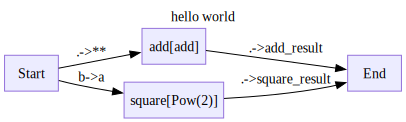

In [ ]:
# define your diagram
with Define('hello world',direction='LR') as Schema:
    V('add',add)
    V('square',Pow(2))
    E('Start->add(**=.)')
    E('Start->square(a=b)')
    E('add->End(add_result=.)')
    E('square->End(square_result=.)')

In [ ]:
# run the diagram
diagram = Schema()
for trace in diagram.run({'a':1,'b':2}):
    # print/log/etc the traces however you want
    trace.pprint(skip_passthrough=True)
# after running, access the output 
diagram.output

Node add:
{'input': {'a': 1, 'b': 2}, 'output': 3}
Node square:
{'input': {'a': 2}, 'output': 4}


{'add_result': 3, 'square_result': 4}

## Reporting Bugs

Found bugs? Missing features?
Feel free to [open an issue](https://github.com/DeanLight/stringdale/issues)

## Contributing

Want to contribute to stringdale? Great!
Feel free to submit a PR or discuss a feature you would like to add in the Issues.

To get a working development environment:

```bash
# clone the repo
git clone https://github.com/DeanLight/stringdale.git    
cd stringdale

# install stringdale in editable dev mode
pip install -e ".[dev]"

# run pre-commit to install commit hooks
pre-commit install

```
`stringdale` is developed using [nbdev](https://nbdev.fast.ai/)

```bash
# Make changes under nbs/ directory
# ...

# clean and export notebooks into a python library
nbdev_clean && nbdev_export

# make sure tests pass
nbdev_test

# Changing the docs? make sure that they are rendering correctly
nbdev_docs
```